In [1]:
import sympy as sp
import numpy as np

In [2]:
x, y, z = sp.symbols('x y z', real=True)
r = sp.symbols('r', real=True, positive=True)
theta, phi = sp.symbols('theta, phi', real=True)
M = sp.symbols('M', real=True)

In [3]:
g_ij_sph = sp.Matrix([[1/(1-1/r),0,0],
                      [0,sp.Pow(r,2),0],
                      [0,0,sp.Pow(r,2)*sp.sin(theta)]])
g_ij_sph

Matrix([
[1/(1 - 1/r),    0,               0],
[          0, r**2,               0],
[          0,    0, r**2*sin(theta)]])

In [4]:

#r_cart = sp.sqrt(sp.Pow(x,2)+sp.Pow(y,2)+sp.Pow(z,2))/(1-1/sp.sqrt(sp.Pow(x,2)+sp.Pow(y,2)+sp.Pow(z,2)))
r_cart = sp.sqrt(sp.Pow(x,2)/2+sp.Pow(y,2)/2+sp.Pow(z,2)/2)

theta_cart = sp.acos(z/r_cart)
phi_cart = sp.atan2(y,x)

x_sph = r*sp.sin(theta)*sp.cos(phi)
y_sph = r*sp.sin(theta)*sp.sin(phi)
z_sph = r*sp.cos(theta)


pol_vec = sp.Matrix([[r_cart],[theta_cart],[phi_cart]])

In [5]:
asd = sp.Matrix([[x, y, z]])

J_sph_to_cart = sp.simplify(pol_vec.jacobian(asd))
J_sph_to_cart

Matrix([
[                                                   sqrt(2)*x/(2*sqrt(x**2 + y**2 + z**2)),                                                    sqrt(2)*y/(2*sqrt(x**2 + y**2 + z**2)),                                                               sqrt(2)*z/(2*sqrt(x**2 + y**2 + z**2))],
[sqrt(2)*x*z/(sqrt((x**2 + y**2 - z**2)/(x**2 + y**2 + z**2))*(x**2 + y**2 + z**2)**(3/2)), sqrt(2)*y*z/(sqrt((x**2 + y**2 - z**2)/(x**2 + y**2 + z**2))*(x**2 + y**2 + z**2)**(3/2)), sqrt(2)*(-x**2 - y**2)/(sqrt((x**2 + y**2 - z**2)/(x**2 + y**2 + z**2))*(x**2 + y**2 + z**2)**(3/2))],
[                                                                         -y/(x**2 + y**2),                                                                           x/(x**2 + y**2),                                                                                                    0]])

In [6]:
sph_metric = sp.Matrix([[1,0,0],
                        [0,sp.Pow(r,2),0],
                        [0,0,sp.Pow(r,2)*sp.sin(theta)]])

sph_metric = sph_metric.subs(r, r_cart)
sph_metric = sp.simplify(sph_metric.subs(theta, theta_cart))

cart_metric = sp.eye(3,3)

In [7]:
sph_metric = sp.simplify(sp.Inverse(J_sph_to_cart)*sph_metric*sp.Transpose(sp.Inverse(J_sph_to_cart))) # no metric in between since in Cartesian it is unity matrix
sph_metric_det = sp.simplify(sp.det(sph_metric))

In [8]:
E = sp.simplify(sp.sqrt(sph_metric_det)*sph_metric)

In [9]:
E 

Matrix([
[sqrt(sqrt((x**2 + y**2 - z**2)/(x**2 + y**2 + z**2))*(x**8 + 4*x**6*y**2 + 2*x**6*z**2 + 6*x**4*y**4 + 6*x**4*y**2*z**2 + 4*x**2*y**6 + 6*x**2*y**4*z**2 - 2*x**2*z**6 + y**8 + 2*y**6*z**2 - 2*y**2*z**6 - z**8))*(x**2*z**2*(x**2 + y**2 - z**2)*(x**2 + y**2 + z**2)**2/8 + x**2*(x**2 + y**2)**2 + y**2*sqrt((x**2 + y**2 - z**2)/(x**2 + y**2 + z**2))*(x**2 + y**2)**2*(x**2 + y**2 + z**2)**2/4)/((x**2 + y**2)**2*(x**2 + y**2 + z**2)),          x*y*sqrt(sqrt((x**2 + y**2 - z**2)/(x**2 + y**2 + z**2))*(x**8 + 4*x**6*y**2 + 2*x**6*z**2 + 6*x**4*y**4 + 6*x**4*y**2*z**2 + 4*x**2*y**6 + 6*x**2*y**4*z**2 - 2*x**2*z**6 + y**8 + 2*y**6*z**2 - 2*y**2*z**6 - z**8))*(z**2*(x**2 + y**2 - z**2)*(x**2 + y**2 + z**2)**2 - 2*sqrt((x**2 + y**2 - z**2)/(x**2 + y**2 + z**2))*(x**2 + y**2)**2*(x**2 + y**2 + z**2)**2 + 8*(x**2 + y**2)**2)/(8*(x**2 + y**2)**2*(x**2 + y**2 + z**2)), x*z*sqrt(sqrt((x**2 + y**2 - z**2)/(x**2 + y**2 + z**2))*(x**8 + 4*x**6*y**2 + 2*x**6*z**2 + 6*x**4*y**4 + 6*x**4*y**2*z**2 

In [10]:
E_num = E.subs(x, sp.symbols('(xg)'))
E_num = E_num.subs(y, sp.symbols('(yg)'))
E_num = E_num.subs(z, sp.symbols('(zg)'))

In [11]:
grid = np.linspace(-1, 1, 400)
xg, yg = np.meshgrid(grid, grid)
zg = 0

In [12]:
E_num[0,0]

sqrt(sqrt(((xg)**2 + (yg)**2 - (zg)**2)/((xg)**2 + (yg)**2 + (zg)**2))*((xg)**8 + 4*(xg)**6*(yg)**2 + 2*(xg)**6*(zg)**2 + 6*(xg)**4*(yg)**4 + 6*(xg)**4*(yg)**2*(zg)**2 + 4*(xg)**2*(yg)**6 + 6*(xg)**2*(yg)**4*(zg)**2 - 2*(xg)**2*(zg)**6 + (yg)**8 + 2*(yg)**6*(zg)**2 - 2*(yg)**2*(zg)**6 - (zg)**8))*((xg)**2*(zg)**2*((xg)**2 + (yg)**2 - (zg)**2)*((xg)**2 + (yg)**2 + (zg)**2)**2/8 + (xg)**2*((xg)**2 + (yg)**2)**2 + (yg)**2*sqrt(((xg)**2 + (yg)**2 - (zg)**2)/((xg)**2 + (yg)**2 + (zg)**2))*((xg)**2 + (yg)**2)**2*((xg)**2 + (yg)**2 + (zg)**2)**2/4)/(((xg)**2 + (yg)**2)**2*((xg)**2 + (yg)**2 + (zg)**2))

In [13]:
E_comps = []

from numpy import sqrt


for i in range(3):
    for j in range(3):
        E_comps.append(eval(str(E_num[i,j])))

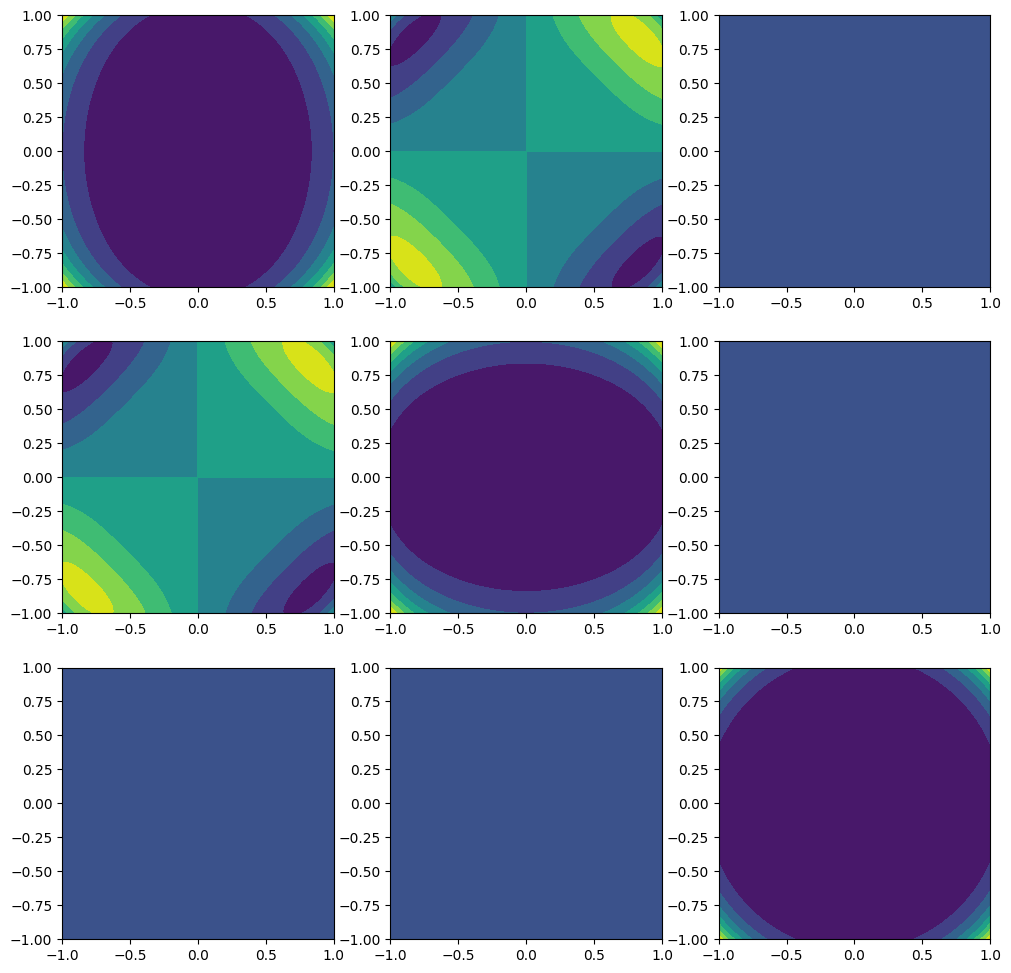

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 12))

for i in range(9):

    ax = fig.add_subplot(3,3,i+1)
    ax.set_aspect('equal')
    ax.contourf(xg, yg, E_comps[i])